# **Fuzzy system**

<div align = "justify">

**Exercise 1:** Quality control in Manufacturing using Fuzzy Systems and Expert Rules

* *Objective:* To understand the application of fuzzy systems in quality control, combined with an expert system for rule-based reasoning.

* *Scenario:* You are tasked with designing a quality control system for manufactured products based on their dimensions, weight, and additional expert rules. The dimensions range from 0 to 100 units, and the weight ranges from 0 to 50 kg.
</div>

In [1]:
# Instalar las bibliotecas necesarias
!pip install numpy scikit-fuzzy

import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import skfuzzy.control as ctrl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.4 MB/s eta 0:00:00


In [2]:
# Definition of input and output variables
dimension = ctrl.Antecedent(np.arange(0, 101, 1), 'dimension')
weight = ctrl.Antecedent(np.arange(0, 51, 1), 'weight')
quality = ctrl.Consequent(np.arange(0, 11, 1), 'quality')  # Output variable for quality (0-10 scale)
material_type = ctrl.Antecedent(np.arange(0, 2, 1), 'material_type')  # High-Grade or Low-Grade
surface_finish = ctrl.Antecedent(np.arange(0, 2, 1), 'surface_finish')  # Smooth or Rough

# Membership functions for dimension (input)
dimension['Small'] = fuzz.trimf(dimension.universe, [0, 0, 50])
dimension['Medium'] = fuzz.trimf(dimension.universe, [15, 50, 75])
dimension['Large'] = fuzz.trimf(dimension.universe, [50, 100, 100])

# Membership functions for weight (input)
weight['Light'] = fuzz.trimf(weight.universe, [0, 0, 20])
weight['Medium'] = fuzz.trimf(weight.universe, [15, 25, 35])
weight['Heavy'] = fuzz.trimf(weight.universe, [20, 50, 50])

# Membership functions for quality (output)
quality['Low'] = fuzz.trimf(quality.universe, [0, 0, 3])
quality['Medium'] = fuzz.trimf(quality.universe, [2, 5, 8])
quality['High'] = fuzz.trimf(quality.universe, [7, 10, 10])

# Membership functions for material type (input)
material_type['Low-Grade'] = fuzz.trimf(material_type.universe, [0, 0, 1])
material_type['High-Grade'] = fuzz.trimf(material_type.universe, [0, 1, 1])

# Membership functions for surface finish (input)
surface_finish['Rough'] = fuzz.trimf(surface_finish.universe, [0, 0, 1])
surface_finish['Smooth'] = fuzz.trimf(surface_finish.universe, [0, 1, 1])

# Fuzzy rules
rule1 = ctrl.Rule(dimension['Small'] & weight['Light'], quality['Low'])
rule2 = ctrl.Rule(dimension['Medium'] & weight['Medium'], quality['Medium'])
rule3 = ctrl.Rule(dimension['Large'] & weight['Heavy'], quality['High'])

# Expert rule based on material and surface finish
rule4 = ctrl.Rule(material_type['High-Grade'] & surface_finish['Smooth'], quality['High'])
rule5 = ctrl.Rule(material_type['Low-Grade'] & surface_finish['Rough'], quality['Low'])

# Fuzzy control system
diagnosis_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
diagnosis_sim = ctrl.ControlSystemSimulation(diagnosis_ctrl)

# Fuzzy control system
diagnosis_sim.input['dimension'] = 90
diagnosis_sim.input['weight'] = 70
diagnosis_sim.input['material_type'] = 1  # High-Grade
diagnosis_sim.input['surface_finish'] = 1  # Smooth

# Compute the result
diagnosis_sim.compute()

# Display the result
print("Quality:", diagnosis_sim.output['quality'])

Quality: 9.0


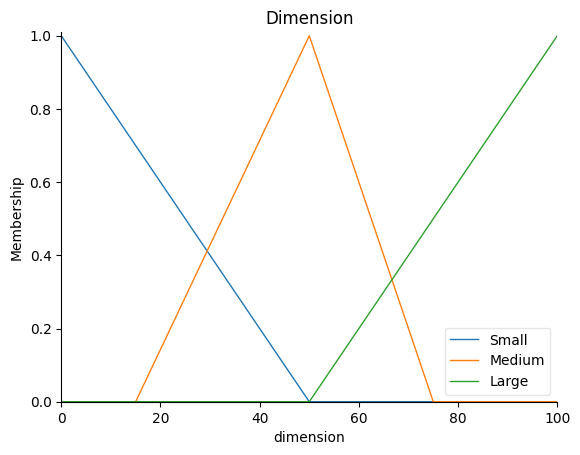

In [13]:
# Graphs
dimension.view()
plt.title("Dimension")
plt.show()

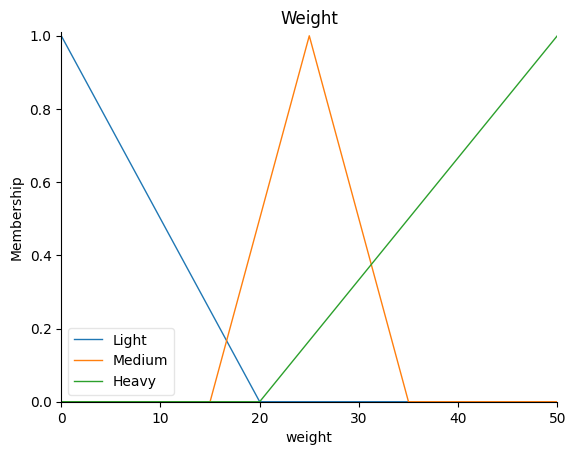

In [14]:
weight.view()
plt.title("Weight")
plt.show()

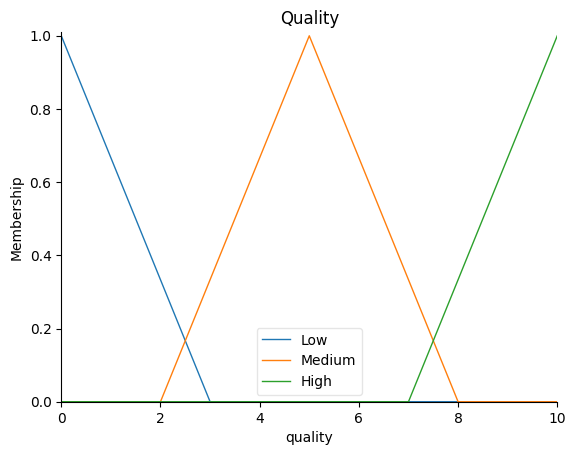

In [15]:
quality.view()
plt.title("Quality")
plt.show()

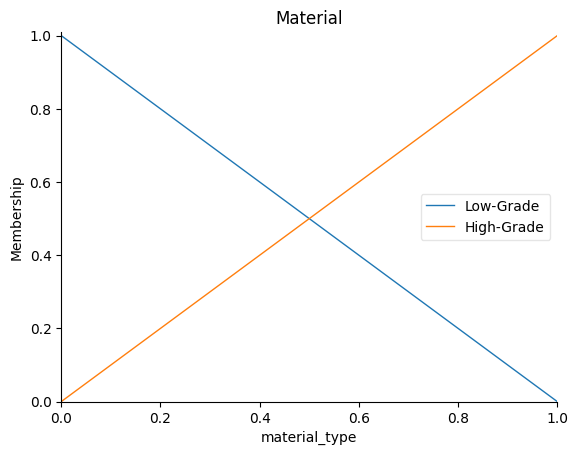

In [16]:
material_type.view()
plt.title("Material")
plt.show()

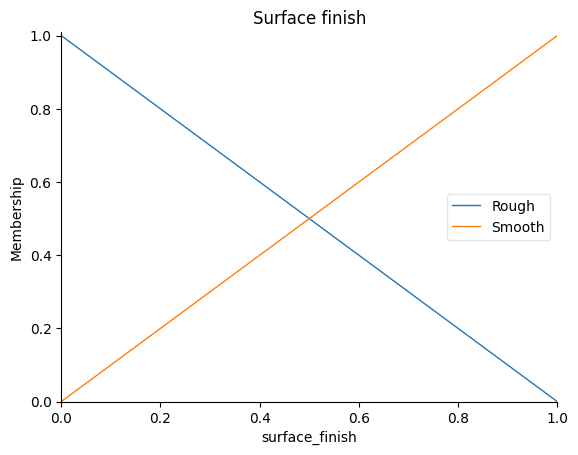

In [17]:
surface_finish.view()
plt.title("Surface finish")
plt.show()

# **Bayesian system**

<div align = "justify">

**Exercise 2:** Driver Assistance System using Bayesian Networks and Expert Rules

* *Objective:* To understand the application of Bayesian networks in driver assistance systems, combined with an expert system for rule-based reasoning.

* *Scenario:* You are designing a driver assistance system that predicts the likelihood of a collision based on the speed of the vehicle, the distance to the vehicle ahead, the condition of the road (wet or dry), and additional expert rules.
</div>

In [8]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 90.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [9]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

In [10]:
# Define the structure
model = BayesianNetwork([('Speed', 'CollisionRisk'),
                         ('Distance', 'CollisionRisk'),
                         ('RoadCondition', 'CollisionRisk')])

# Define the CPTs (Conditional Probability Tables)

# P(Speed) = 'Low' (0) or 'High' (1)
cpd_speed = TabularCPD(variable='Speed', variable_card=2, values=[[0.6], [0.4]])

# P(Distance) = 'Short' (0) or 'Long' (1)
cpd_distance = TabularCPD(variable='Distance', variable_card=2, values=[[0.6], [0.4]])

# P(RoadCondition) = 'Dry' (0) or 'Wet' (1)
cpd_road_condition = TabularCPD(variable='RoadCondition', variable_card=2, values=[[0.8], [0.2]])

# Values represent the probability of a collision for different combinations of Speed, Distance, and RoadCondition
cpd_collision_risk = TabularCPD(variable='CollisionRisk', variable_card=2,
                                  values=[[0.95, 0.7, 0.85, 0.4, 0.99, 0.7, 0.74, 0.2],
                                          [0.05, 0.3, 0.15, 0.6, 0.01, 0.3, 0.26, 0.8]],

                                # P(CollisionRisk|Speed=Low, Distance=Short) = 0.95 ...
                                  evidence=['Speed', 'Distance', 'RoadCondition'],
                                  evidence_card=[2, 2, 2])

# Add the CPTs to the model
model.add_cpds(cpd_speed, cpd_distance, cpd_road_condition, cpd_collision_risk)

# Check if the model is valid
assert model.check_model()

# Perform inference
inference = VariableElimination(model)

# Simulate a scenario: High speed, short distance, wet road
result = inference.query(variables=['CollisionRisk'],
                         evidence={'Speed': 0, 'Distance': 0, 'RoadCondition': 0})
print(result)

+------------------+----------------------+
| CollisionRisk    |   phi(CollisionRisk) |
+==================+======================+
| CollisionRisk(0) |               0.9500 |
+------------------+----------------------+
| CollisionRisk(1) |               0.0500 |
+------------------+----------------------+
